<a href="https://colab.research.google.com/github/ekanshi258/optimization-algos/blob/master/structural_design_1_nsga2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymoo

This experiment is based on the following paper:  
_Solving structural engineering design optimization problems using an artificial bee colony algorithm_: https://www.aimsciences.org/article/doi/10.3934/jimo.2014.10.777

I will be using the NSGA2 to solve the same problem as given in the paper.


In [4]:
import numpy as np
from pymoo.model.problem import FunctionalProblem

The paper states 3 structural design problems. 

Problem 1:  
**Design of pressure vessel. (Section 4.2.1).**


---


Objective functions:  
```
Minimize f(X) = 0.6224*x1*x3*x4 + 1.7781*x2*x3^2+ 3.1661*x1^2*x4 + 19.84*x1^2*x3

Such that:
g1(X) = −x1 + 0.0193*x3 <= 0
g2(X) = −x2 + 0.00954*x3 <= 0
g3(X) = − pi*x3^2*x4 − 4/3 *pi*x3^3 + 1296000 <= 0
g4(X) = x4 − 240 <= 0

Bounds:
0.0625 <= x1, x2 <= 99*0.0625 
10 <= x3, x4 <= 200
```

> There are four design variable associated with it namely
as thickness of the pressure vessel, Ts = x1, thickness of the head, Th = x2, inner radius of the vessel, R = x3, and length of the vessel without heads, L = x4 i.e. the variables vectors are given (in inches) by X = (Ts, Th,R,L) = (x1, x2, x3, x4).
 



In [5]:
import math

pi = math.pi

#objective functions
objs = [
    lambda x: 0.6224 * x[0]*x[2]*x[3] + 1.7781 * x[1]*x[2]**2 + 3.1661 * x[0]**2 * x[3] + 19.84*x[0]**2 * x[2],
]

# Contraint equations
constr_ieq = [
    lambda x: - x[0] + 0.0193*x[2],
    lambda x: - x[1] + 0.00954*x[2],
    lambda x: - pi*x[2]**2*x[3] - 4/3 *pi*x[2]**3 + 1296000,
    lambda x: x[3] - 240
]

# value bounds
lower_bound = np.array([0.0625, 0.0625, 10, 10])
upper_bound = np.array([99*0.0625, 99*0.0625, 200, 200])

# initialising problem
problem = FunctionalProblem(4, objs, constr_ieq=constr_ieq, xl=lower_bound, xu=upper_bound)

Initialising the NSGA2 Algo and termination condition:

In [6]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation, get_termination

algorithm = NSGA2(
    pop_size=100,
    n_offsprings=25,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

termination = get_termination("n_gen", 280)

Optimizing:

In [ ]:
from pymoo.optimize import minimize

ans = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

In [8]:
print("X: ", ans.X)
print("Obj: ", ans.F)
print("Constraints: ", ans.G)

X:  [  0.83135289   0.41154401  43.0700043  165.01732714]
Obj:  [5986.69227946]
Constraints:  [0. 0. 0. 0.]


According to the paper, the optimal result of the objective function is 5885.40 using Bee Colony. Our result is not too far from it. 

Observations:

We may need to add some parameter tuning for better results (for example, to decide termination condition, number of offsprings, initial population)

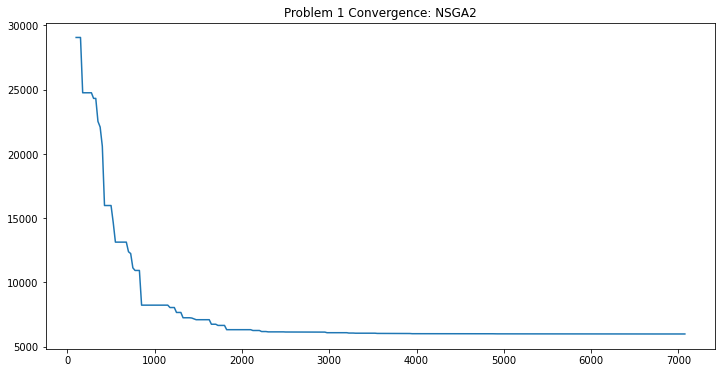

In [9]:
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in ans.history])
opt = np.array([e.opt[0].F for e in ans.history])
plt.figure(figsize=(12,6))
plt.title("Problem 1 Convergence: NSGA2")
plt.plot(n_evals, opt, "-")
plt.show()

In [ ]:
convergence with log scaled y-axis

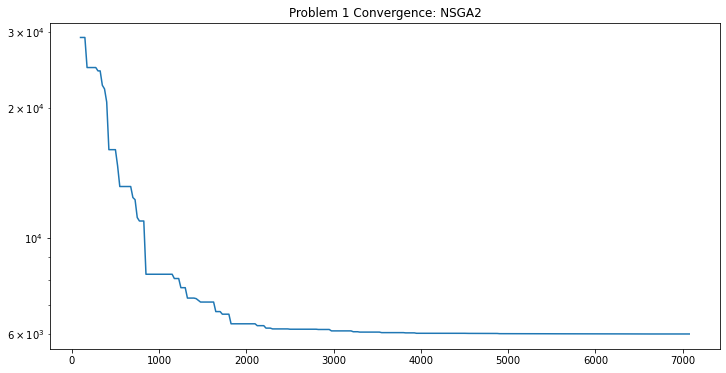

In [11]:
n_evals = np.array([e.evaluator.n_eval for e in ans.history])
opt = np.array([e.opt[0].F for e in ans.history])
plt.figure(figsize=(12,6))
plt.title("Problem 1 Convergence: NSGA2")
plt.plot(n_evals, opt, "-")
plt.yscale("log")
plt.show()